In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import statsmodels.api as sm

movies_full = pd.read_csv('data/imdb1000_data.csv')

# Dataset Description: IMDb Top 1000 Movies

This dataset contains information about the top 1000 movies rated on IMDb. Below is a description of each column:

| Column | Description |
|--------|-------------|
| **Poster_Link** | URL to the movie poster image on IMDb |
| **Series_Title** | Title of the movie |
| **Released_Year** | Year in which the movie was released |
| **Certificate** | Rating certificate (e.g., A, U, UA) |
| **Runtime** | Total runtime of the movie in minutes |
| **Genre** | Categories/genres the movie belongs to |
| **IMDB_Rating** | Movie rating on IMDb (scale of 1-10) |
| **Overview** | Brief summary or plot description of the movie |
| **Meta_score** | Score earned on Metacritic (scale of 1-100) |
| **Director** | Name of the movie's director |
| **Star1** | Name of the lead actor/actress |
| **Star2** | Name of the second lead actor/actress |
| **Star3** | Name of the third lead actor/actress |
| **Star4** | Name of the fourth lead actor/actress |
| **No_of_Votes** | Total number of votes received on IMDb |
| **Gross** | Box office earnings of the movie in dollars |

The dataset contains 1000 entries with 16 columns. Some columns like Certificate (10.1% missing) and Meta_score (15.7% missing) contain null values.

In [334]:
movies = movies_full.drop(columns=['Poster_Link', 'Overview', 'Star3', 'Star4', 'No_of_Votes'])
movies = movies.set_index('Series_Title')
movies.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Gross
Series_Title,,,,,,,,,,
The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,"28,341,469"
The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,"134,966,411"
The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,"534,858,444"
The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,"57,300,000"
12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,"4,360,000"


In [335]:
movies['Released_Year'] = pd.to_numeric(movies['Released_Year'], errors='coerce')
# movies['No_of_Votes'] = pd.to_numeric(movies['No_of_Votes'], errors='coerce')
movies['Released_Year'].dropna().unique()
movies['Runtime'] = movies['Runtime'].str.split(' ').str[0].astype(int)
movies['Gross'] = movies['Gross'].str.replace(',', '')
movies['Gross'] = pd.to_numeric(movies['Gross'], errors='coerce')
movies.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Gross
Series_Title,,,,,,,,,,
The Shawshank Redemption,1994.0,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,28341469.0
The Godfather,1972.0,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,134966411.0
The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,534858444.0
The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,57300000.0
12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,4360000.0


In [336]:
movies['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [337]:
print('The number of missing values: ')
for item in movies.columns:
    print(f'{item} - {movies[item].isnull().sum()}')

The number of missing values: 
Released_Year - 1
Certificate - 101
Runtime - 0
Genre - 0
IMDB_Rating - 0
Meta_score - 157
Director - 0
Star1 - 0
Star2 - 0
Gross - 169


In [338]:
movies.sort_values(by='Released_Year', ascending=False).head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Gross
Series_Title,,,,,,,,,,
Druk,2020.0,NaN,117,"Comedy, Drama",7.8,81.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,NaN
Hamilton,2020.0,PG-13,160,"Biography, Drama, History",8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,NaN
Dil Bechara,2020.0,UA,101,"Comedy, Drama, Romance",7.9,NaN,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,NaN
Soul,2020.0,U,100,"Animation, Adventure, Comedy",8.1,83.0,Pete Docter,Kemp Powers,Jamie Foxx,NaN
The Trial of the Chicago 7,2020.0,R,129,"Drama, History, Thriller",7.8,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,NaN


In [339]:
meta_score = movies['Meta_score']
imdb_score = movies['IMDB_Rating'] * 10
critics_score = pd.concat([meta_score, imdb_score], axis=1)
critics_score = critics_score.dropna()
critics_score.describe()

,Meta_score,IMDB_Rating
count,843.000000,843.000000
mean,77.971530,79.316726
std,12.376099,2.837322
min,28.000000,76.000000
25%,70.000000,77.000000
50%,79.000000,79.000000
75%,87.000000,81.000000
max,100.000000,93.000000


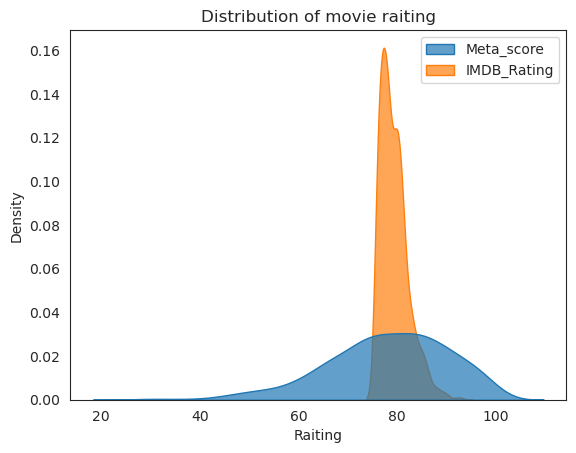

In [340]:
sns.kdeplot(data=critics_score, fill=True, alpha=0.7, common_norm=False)
plt.title('Distribution of movie raiting')
plt.ylabel('Density')
plt.xlabel('Raiting')
plt.show()

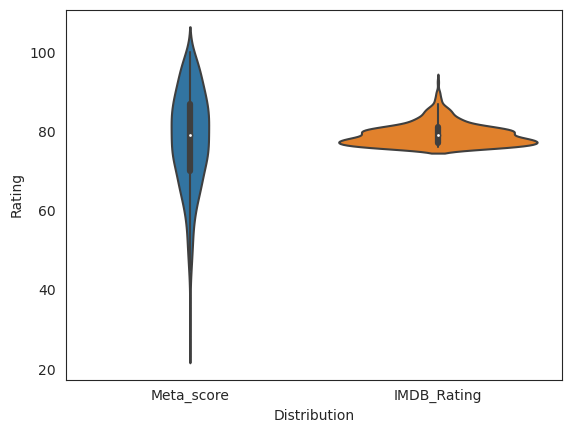

In [341]:
sns.violinplot(data=critics_score)
plt.ylabel('Rating')
plt.xlabel('Distribution')
plt.show()

# T-testing
There is a statistically significant difference between IMDb and Metacritic scores for the movies analyzed. The p-value (0.0021) is much smaller than the standard threshold of 0.05, meaning the difference is unlikely to be due to random chance.

In [342]:
t_test = sp.ttest_ind(critics_score["IMDB_Rating"], critics_score["Meta_score"], alternative = "two-sided")
t_test.pvalue

0.002131446476396098

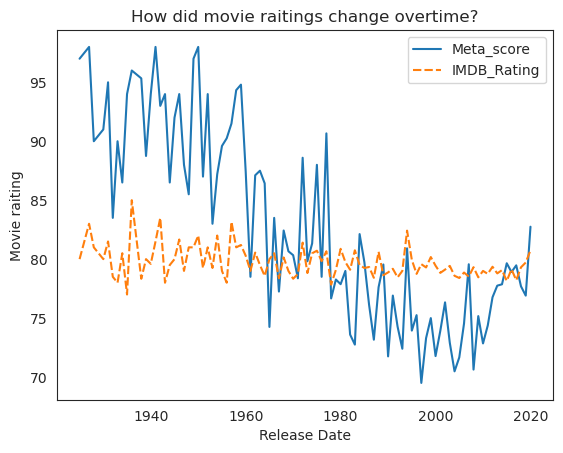

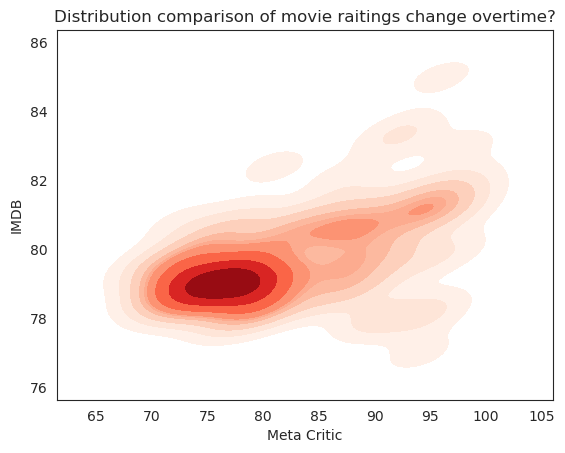

In [351]:
movies_time = pd.concat([meta_score, imdb_score, movies['Released_Year']], axis=1).dropna()

movies_by_year = movies_time.groupby('Released_Year').agg({
	'Meta_score': 'mean',
	'IMDB_Rating': 'mean'
}).reset_index()

movies_by_year = movies_by_year.set_index('Released_Year')
sns.lineplot(data=movies_by_year)
plt.title('How did movie raitings change overtime?')
plt.ylabel('Movie raiting')
plt.xlabel('Release Date')
plt.show()
sns.kdeplot(x=movies_by_year.Meta_score, y=movies_by_year.IMDB_Rating, cmap="Reds", fill=True, bw_adjust=0.7)
plt.title('Distribution comparison of movie raitings change overtime?')
plt.xlabel('Meta Critic')
plt.ylabel('IMDB')
plt.show()

Ttest here

In [ ]:
t_test = sp.ttest_ind(movies_by_year["IMDB_Rating"], movies_by_year["Meta_score"], alternative = "two-sided")
t_test.pvalue

0.0007288994624564086

NExt

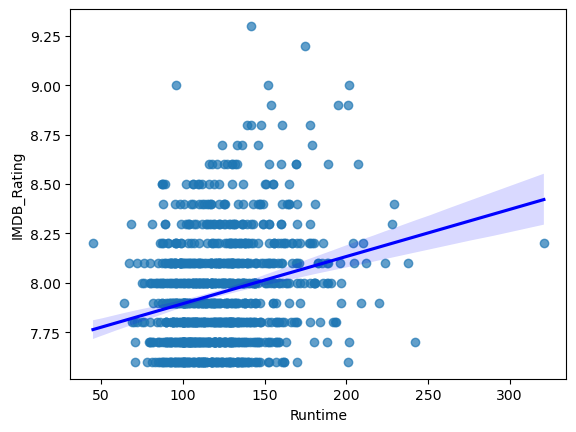

In [ ]:
# use the code below for plotting any linear relationships, e.g if we want to check if the control variables are colinear
sns.regplot(x = movies['Runtime'] , y = movies['IMDB_Rating'] , scatter_kws={'alpha':0.7}, line_kws={'color': 'blue'})
plt.show()

In [ ]:
#then I had an idea of a way to include ‘certificate’ in the model, by converting it to a categorical variable with only two options- Kids and Adult
#Couldn’t quite get the code to work, but will try again later
movies = movies.dropna()

print(movies['Certificate'].unique())
kid_movies = ['A', 'UA', 'U/A' , 'U' , 'PG-13' , 'TV-14', 'PG' ,'TV-PG', 'G' ,'Passed', 'Approved']
adult_movies = ['R', '16', 'GP', 'TV-MA', 'Unrated']
def classify_cert(row):
    if row in kid_movies:
        return 1
    elif row in adult_movies:
        return 0
    else:
        print('There is a NaN value')
        return np.nan

['A' 'UA' 'U' 'R' 'G' 'PG-13' 'PG' 'Passed' 'Approved' 'TV-PG' 'U/A' 'GP']


In [ ]:
movies = movies.copy()
movies['Certificate_category'] = movies['Certificate'].apply(classify_cert)
movies.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Gross,Certificate_category
Series_Title,,,,,,,,,,,
The Shawshank Redemption,1994.0,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,28341469.0,1
The Godfather,1972.0,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,134966411.0,1
The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,534858444.0,1
The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,57300000.0,1
12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,4360000.0,1


In [ ]:
n_as_star1 = movies['Star1'].value_counts()
n_as_star2 = movies['Star2'].value_counts()
rs_combined = n_as_star1.add(n_as_star2, fill_value=0)
categorised_stars = pd.cut(rs_combined, [0, 1, 4, 15], labels=[0, 1, 2])

In [ ]:
def categorise_stars(row):
    star1 = categorised_stars[row['Star1']]
    star2 = categorised_stars[row['Star2']]

    return star1 + star2

movies['Stars_Level'] = movies.apply(categorise_stars, axis=1)

In [ ]:
def categorise_director(row):
    categorised_director = pd.cut(movies['Director'].value_counts(), [0, 1, 2, 7, 20], labels=[0, 1, 2, 3])
    return categorised_director[row]

movies['Director_Level'] = movies['Director'].apply(categorise_director)

In [ ]:
# notes for creating the model:
# using 'n_of_votes' increases the r-squared value significantly, however we cannot justify using it in the model as a predictor. 
# It does not align with the objectives of this research project. 
# This is because by including it in the model would suggest that voting on a movie would make it better, which is not a plausible causation. 
# It is also unclear in our dataset whether 'n_of_votes' applies to just metacritic, or both IMDB and metacritic

formula_string = "IMDB_Rating ~ Runtime + Certificate_category + Gross + Released_Year + Director_Level + Stars_Level"

model = sm.formula.ols(formula = formula_string, data = movies)
model_fitted = model.fit()


model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IMDB_Rating   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     19.15
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           9.69e-21
Time:                        17:59:06   Log-Likelihood:                -82.688
No. Observations:                 713   AIC:                             179.4
Df Residuals:                     706   BIC:                             211.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.2149      1.167     11.322      0.000      10.923      15.507
Runtime                  0.0024      0.000      5.759      0.000       0.002       0.003
Certificate_category     0.0362      0.028      1.310      0.191      -0.018       0.090
Gross                 2.814e-10   9.91e-11      2.840      0.005    8.69e-11    4.76e-10
Released_Year           -0.0028      0.001     -4.884      0.000      -0.004      -0.002
Director_Level           0.0461      0.011      4.366      0.000       0.025       0.067
Stars_Level             -0.0077      0.010     -0.771      0.441      -0.027       0.012
==============================================================================
Omnibus:                       95.709   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.990
Skew:                           0.926   Prob(JB):                     2.42e-31
Kurtosis:                       4.147   Cond. No.                     1.59e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

continue working on this